# BIG DATA

## TASK 1

### 1.1

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris_data.csv', delimiter=';')
labels = pd.read_csv('iris_labels.csv', delimiter=';')

In [13]:
print(data.shape)
print(data.head())

print(labels.shape)
print(labels.head())

print(data.columns)
print(labels.columns)

(6500, 5)
    pl   pw   sl   sw  id
0  5.0  3.5  1.3  0.3   1
1  4.8  3.0  1.4  0.2   2
2  4.7  3.2  1.3  0.2   3
3  4.6  3.2  1.5  0.2   4
4  4.9  3.4  1.3  0.2   5
(6500, 3)
  examiner  id      species
0   Sobhan   1  Iris-setosa
1   Andrej   2  Iris-setosa
2    Ahmad   3  Iris-setosa
3   Matteo   4  Iris-setosa
4   Sobhan   5  Iris-setosa
Index(['pl', 'pw', 'sl', 'sw', 'id'], dtype='object')
Index(['examiner', 'id', 'species'], dtype='object')


### 1.2

In [14]:
data = pd.merge(data, labels, on="id", how="inner")

### 1.3

In [15]:
data.drop(['examiner'], axis=1, inplace=True)

### 1.4

In [16]:
data = data.sort_values('species')

### 1.5

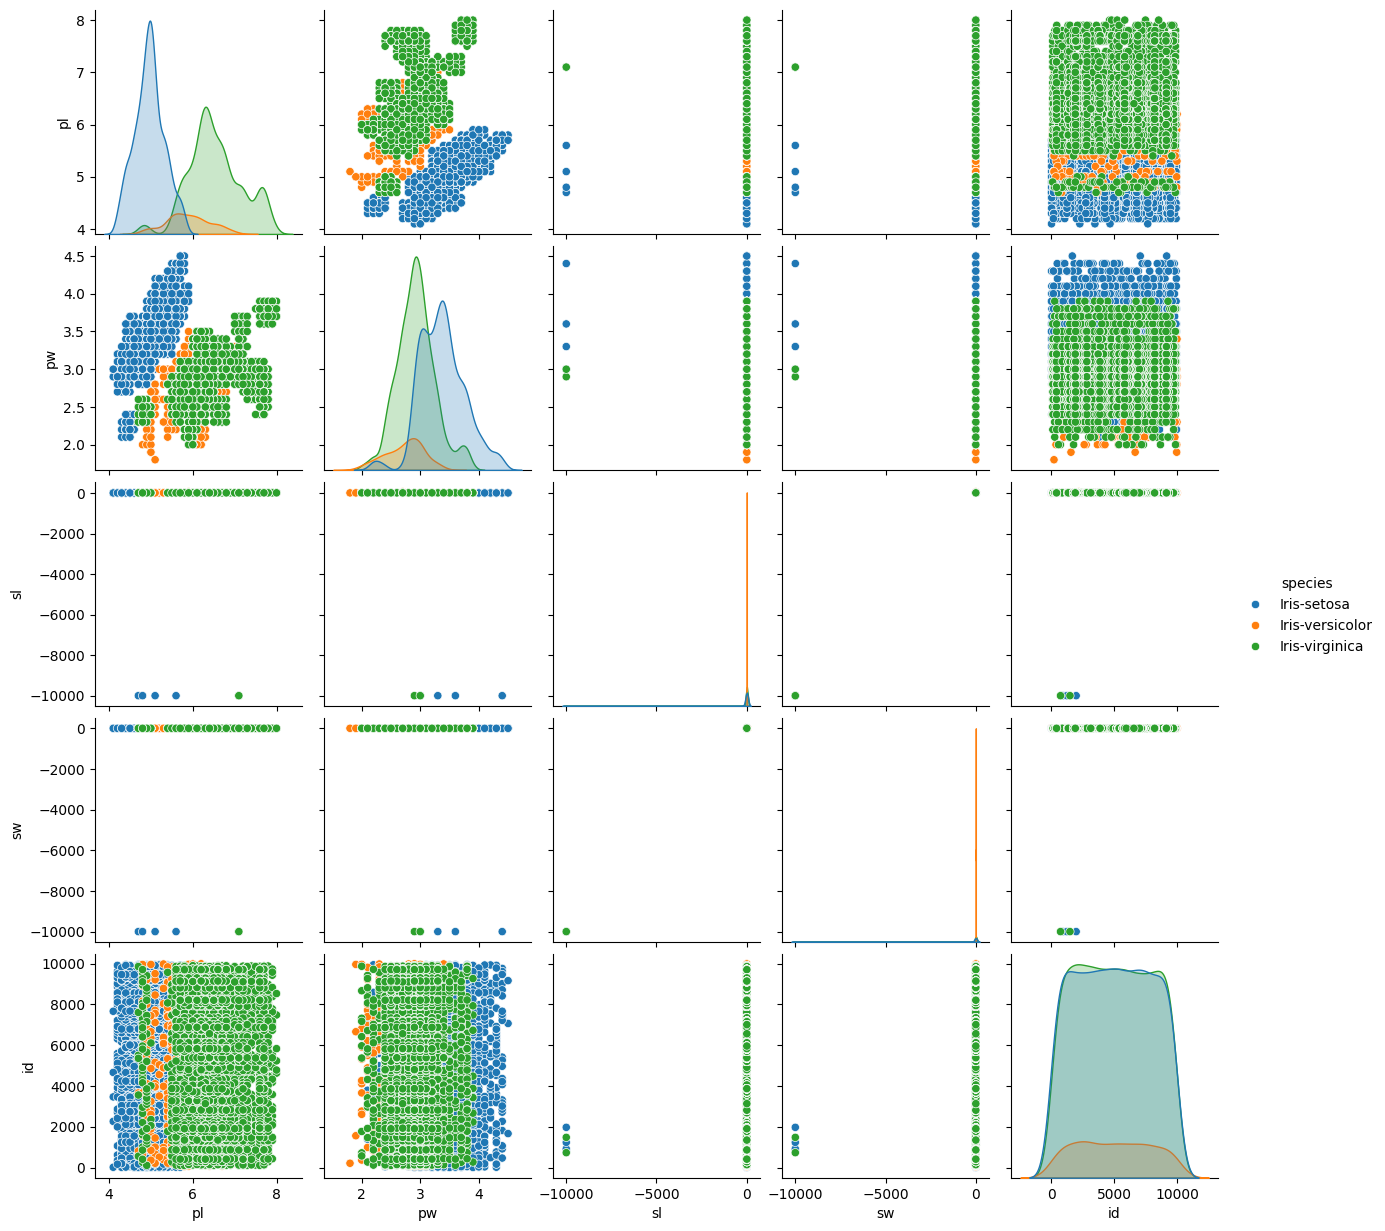

In [18]:
import seaborn as sns


sns.pairplot(data, hue="species")


## Task 2

### 2.1

In [19]:
print(data.value_counts("species"))

species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64


## Task 3

### 3.1

In [21]:
data = data[data["sl"] != -9999]
data = data[data["sw"] != -9999]

### 3.2

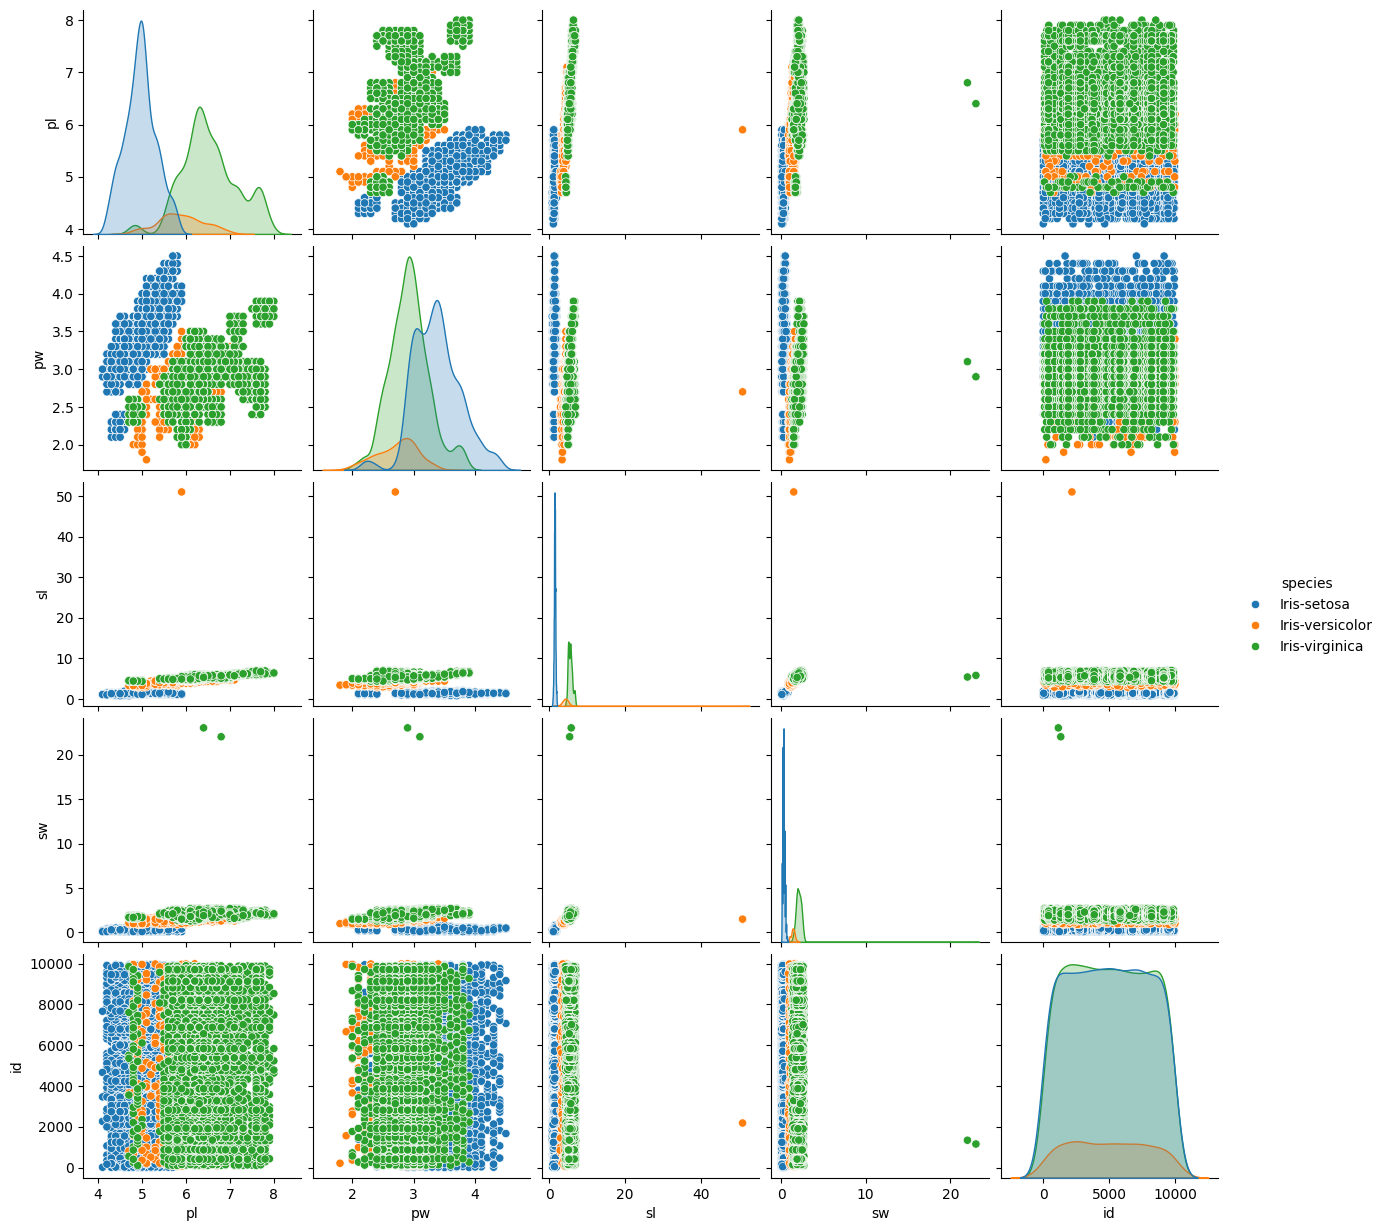

In [27]:
sns.pairplot(data, hue="species")

In [33]:
from scipy import stats

zscores = stats.zscore(data[["sl", "sw", "pl", "pw"]])


outliers = (abs(zscores) > 2.5).any(axis=1)

outlier_rows = data[outliers]

print(outlier_rows)


       pl   pw   sl    sw    id         species
3555  5.7  4.4  1.5   0.5  5416     Iris-setosa
3465  5.6  4.3  1.3   0.3  5284     Iris-setosa
3449  5.6  4.4  1.5   0.4  5266     Iris-setosa
3571  5.3  4.2  1.4   0.2  5434     Iris-setosa
3668  5.5  4.2  1.4   0.3  5584     Iris-setosa
...   ...  ...  ...   ...   ...             ...
878   6.8  3.1  5.4  22.0  1340  Iris-virginica
4674  6.0  2.0  5.0   1.5  7170  Iris-virginica
1154  5.9  2.0  5.1   1.5  1770  Iris-virginica
3511  5.9  2.0  5.0   1.6  5370  Iris-virginica
3901  6.0  2.0  5.0   1.5  5970  Iris-virginica

[127 rows x 6 columns]


In [35]:
outlier_ids = outlier_rows['id'].tolist()
print(outlier_ids)


data = data[~data["id"].isin(outlier_ids)]

[5416, 5284, 5266, 5434, 5584, 5566, 4966, 4834, 5116, 6316, 6166, 6183, 6184, 6466, 6334, 5866, 5716, 6016, 3634, 3616, 3916, 3933, 3766, 3784, 3316, 3166, 3183, 3184, 3466, 3483, 3934, 4516, 4534, 4666, 4084, 4066, 4366, 4216, 8866, 8734, 9033, 9034, 9016, 8716, 8416, 8434, 8583, 8566, 9766, 9616, 9916, 9934, 9784, 9316, 9166, 9466, 8266, 7084, 7066, 7366, 7216, 6616, 6766, 6916, 6784, 7966, 7834, 8134, 8116, 7516, 7534, 7816, 7666, 1834, 766, 2566, 2716, 1816, 316, 484, 2266, 616, 1966, 2134, 466, 2434, 2433, 1066, 2866, 1216, 1366, 1384, 3016, 1684, 16, 1666, 184, 2734, 166, 1234, 2184, 1561, 5911, 6811, 5319, 6661, 3661, 4111, 2769, 211, 369, 2611, 4263, 9961, 9963, 9870, 7320, 1155, 720, 8670, 570, 6420, 1340, 7170, 1770, 5370, 5970]


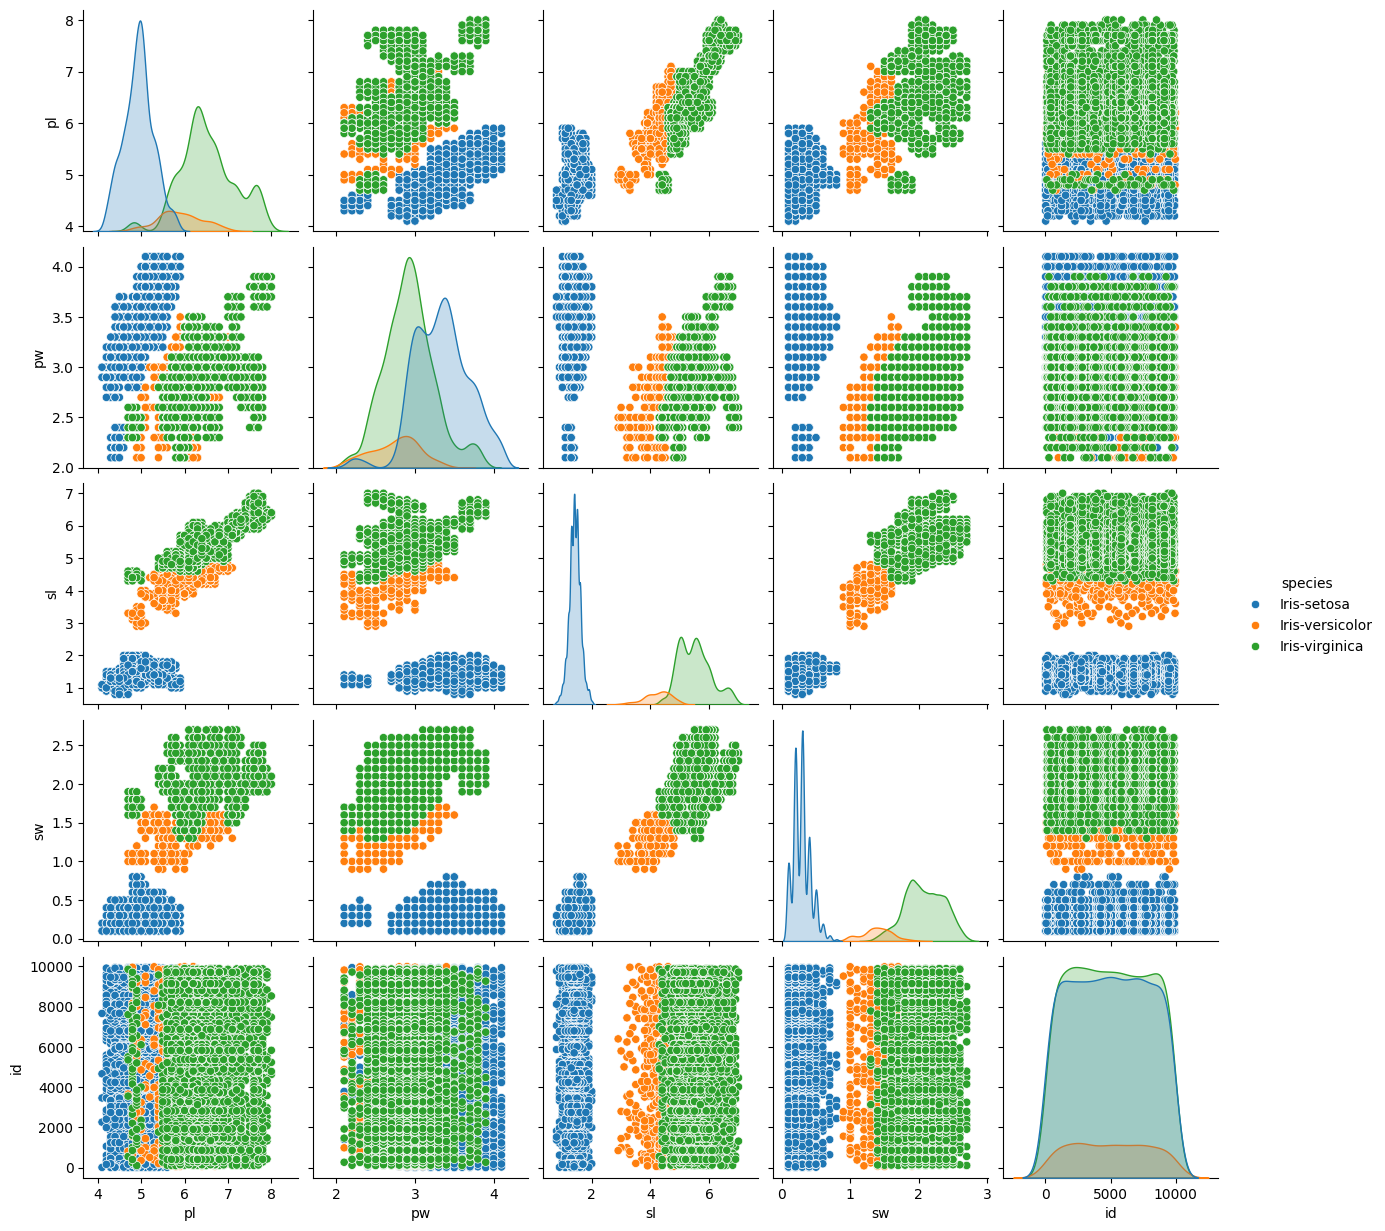

In [36]:
sns.pairplot(data, hue="species")

## Task 4

### 4.1

In [38]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaled = MinMaxScaler().fit_transform(data[["sl", "sw", "pl", "pw"]])

### 4.2

In [39]:
from sklearn.preprocessing import StandardScaler

sd_scaled = StandardScaler().fit_transform(data[["sl", "sw", "pl", "pw"]])

### 4.3

In [40]:
from sklearn.decomposition import PCA
pca = PCA()

principal_components = pca.fit_transform(data[["sl", "sw", "pl", "pw"]])

### 4.4

In [41]:
pd.DataFrame(pca.components_, columns =[ "Sepal L" , "Sepal W" ,
"Petal L" , "Petal W" ] ,
index =[ 'PC 1' , 'PC 2' , 'PC 3' , 'PC 4' ]).abs().mean(axis =0)

Sepal L    0.382053
Sepal W    0.453031
Petal L    0.478585
Petal W    0.439487
dtype: float64

### 4.5

In [42]:
data_rescaled = data.copy()
scaler = MinMaxScaler(feature_range=(0, 100))
data_rescaled["pl"] = scaler.fit_transform(data_rescaled[["pl"]])

X_rescaled = data_rescaled[["sl", "sw", "pl", "pw"]]
pca_rescaled = PCA(n_components=4)
pca_rescaled.fit(X_rescaled)

contributions_rescaled = pd.DataFrame(
    pca_rescaled.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=["PC 1", "PC 2", "PC 3", "PC 4"]
).abs().mean(axis=0)
print(contributions_rescaled)

Sepal L    0.373804
Sepal W    0.421007
Petal L    0.276000
Petal W    0.379331
dtype: float64


### 4.6

In [43]:

outlier_data = data.copy()
outlier_data.loc[outlier_data.index[0], "pl"] = 5000

X_outlier = outlier_data[["sl", "sw", "pl", "pw"]]
pca_outlier = PCA(n_components=4)
pca_outlier.fit(X_outlier)

contributions_outlier = pd.DataFrame(
    pca_outlier.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=["PC 1", "PC 2", "PC 3", "PC 4"]
).abs().mean(axis=0)
print(contributions_outlier)

Sepal L    0.336390
Sepal W    0.360757
Petal L    0.250023
Petal W    0.297960
dtype: float64


## Task 5

### 5.1 

In [44]:
sample = data.sample(n=150)

### 5.2

In [ ]:
sample =